In [74]:
import numpy as np
from scipy.stats import *
import math
import random

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams

In [35]:
%matplotlib inline

# 10.1

In [36]:
A = rv_discrete(values=((3, 10), (1/2, 1/2)))
B = rv_discrete(values=((2, 23, 25), (1/3, 1/3, 1/3)))

In [52]:
N = 2_000
x = []
y = []
z = []

for i in range(1, N+1):
    x.append(i)
    
    sample_a = A.rvs(size=i).mean()
    sample_b = B.rvs(size=i).mean()
    sample = sample_a + sample_b
    
    y.append(sample/36)
    z.append(sample_a/sample)
    
P = sum(y)/N
P_ = sum(z)/N
P, P_

(0.6440448130668721, 0.28109001470898987)

In [57]:
N = 10_000
cnt = 0
cnt_ = 0

for i in range(1, N+1):
    
    c_a = A.rvs()
    c_b = B.rvs()
    
    C = [1]*c_a + [2]*c_b + [0]*(36-c_a-c_b)
    
    t = np.random.choice(C)
    if t in [1, 2]:
        cnt += 1
        
    if t==1:
        cnt_ += 1
        
cnt/N, cnt_/cnt

(0.6425, 0.29245136186770426)

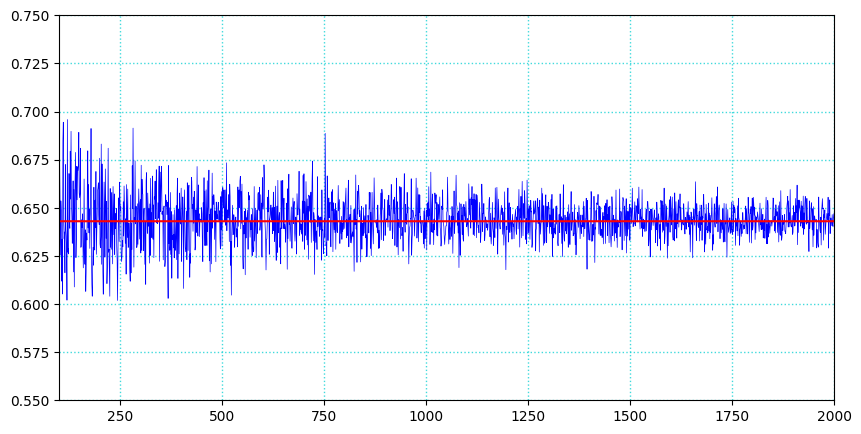

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlim(100, N)
ax.set_ylim(0.55, 0.75)

ax.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)

ax.plot(x, y, color='b', lw=0.5)
ax.plot(x, [P]*N, color='r')

plt.show()

In [58]:
urn1 = ['w1']*9 + ['b1']*13
urn2 = ['w2']*19 + ['b2']*20
n = 10000
A_count = 0
H_count = 0
for k in range(0, n):
    urn3 = list(np.random.choice(urn1, 7, replace=False)) + list(np.random.choice(urn2, 8, replace=False))
    rez = np.random.choice(urn3, 1)
    if rez == 'w1' or rez == 'w2':
        A_count += 1
        if rez == 'w1':
            H_count += 1
print(f'P(A) = {A_count/n}')
print(f'P(H|A) = {H_count/A_count}')

P(A) = 0.4545
P(H|A) = 0.42376237623762375


## Задание 10.4

$\mathbb E(X)$

In [63]:
import numpy as np

n = 100000
events = []

for _ in range(n):
    random_list = []
    event = 0
    while np.count_nonzero(random_list == 1) != 12:
        random_list = np.random.randint(2, size=20)
        event += 1
    events.append(event)
sum(events) / len(events)

8.31854

# №10.5

In [66]:
basket = ['r']*17 + ['b']*5 + ['o']*13

In [68]:
N = 1_000_000
x, y = [], []
for _ in range(N):
    sample = list(np.random.choice(basket, 19, replace=False))
    x.append(sample.count('r'))
    y.append(sample.count('b'))
np.cov(x, y)[0][1]

-0.6225592436312447

In [69]:
np.cov(x, y, bias=True)[0][1]

-0.6225586210720011

# 10.8

In [71]:
# Вероятность P(A)

X = uniform(0, 40)
Y = uniform(0, 16)
N = 100_000
count = 0
for i in range(N):
    x1 = X.rvs(size=1)[0]
    y1 = Y.rvs(size=1)[0]
    x2 = X.rvs(size=1)[0]
    y2 = Y.rvs(size=1)[0]
    if ((x2 - x1)**2 + (y2 - y1)**2)**0.5 < 11:
        count += 1

count/N

0.37091

In [70]:
# Вероятность P(A|B)

X = uniform(0, 40)
Y = uniform(0, 16)
N = 100_000
count1 = 0
count2 = 0
for i in range(N):
    x1 = X.rvs(size=1)[0]
    y1 = Y.rvs(size=1)[0]
    x2 = X.rvs(size=1)[0]
    y2 = Y.rvs(size=1)[0]
    if ((x2 - x1)**2 + (y2 - y1)**2)**0.5 < 11 and abs(x2 - x1) < 14:
        count1 += 1
    if abs(x2 - x1) < 14:
        count2 += 1

count1/count2

0.6382919728268405

# 9

In [79]:
# Вероятность P(A)

U = uniform(0, 46)
V = uniform(0, 12)
#N = 10**5
count = 0
points = []

while(len(points)!=100_000):
    x = U.rvs(size=1)[0]
    y = V.rvs(size=1)[0]
    if (x-23)**2/(23**2) + (y-6)**2/36 <= 1:
        points.append((x, y))


for i in range(N):
    point_1 = random.choice(points)
    point_2 = random.choice(points)
    if ((point_1[0] - point_2[0])**2 + (point_1[1] - point_2[1])**2)**0.5 < 9.2:
        count += 1

count/N

0.35206

In [81]:
print(len(points))

100000


In [78]:
# Вероятность P(A|B)

U = uniform(0, 46)
V = uniform(0, 12)
#N = 100_000
count1 = 0
count2 = 0
points = []

while(len(points)!=100_000):
    x = U.rvs(size=1)[0]
    y = V.rvs(size=1)[0]
    if (x-23)**2/529 + (y-6)**2/36 < 1:
        points.append((x, y))


for i in range(N):
    point_1 = random.choice(points)
    point_2 = random.choice(points)
    if ((point_1[0] - point_2[0])**2 + (point_1[1] - point_2[1])**2)**0.5 < 9.2\
    and (point_1[0] > 23 and point_2[0] < 23 and point_1[1] > 6 and point_2[1] < 6\
    or point_1[0] < 23 and point_2[0] > 23 and point_1[1] < 6 and point_2[1] > 6):
        count1 += 1
    if point_1[0] > 23 and point_2[0] < 23 and point_1[1] > 6 and point_2[1] < 6\
    or point_1[0] < 23 and point_2[0] > 23 and point_1[1] < 6 and point_2[1] > 6:
        count2 += 1

count1/count2

0.0739374498797113

# 10.10

In [84]:
X = uniform()
Y = uniform()
Z = uniform()

N = 100_000

count1 = 0
count2 = 0
count3 = 0

for i in range(N):
    
    A = X.rvs(size = 3)
    B = Y.rvs(size = 3)
    C = Z.rvs(size = 3)
    
    AB = ((B[0]-A[0])**2 + (B[1]-A[1])**2 + (B[2]-A[2])**2)**0.5
    AC = ((C[0]-A[0])**2 + (C[1]-A[1])**2 + (C[2]-A[2])**2)**0.5
    BC = ((C[0]-B[0])**2 + (C[1]-B[1])**2 + (C[2]-B[2])**2)**0.5
    
    min_side = min(AB, AC, BC)
    med_side = AB + BC + AC - max(AB, AC, BC) - min(AB, AC, BC)
    max_side = max(AB, AC, BC)
    
    #Найдем минимальный и максимальный стороны через теорему косинусов
    
    min_angle = math.degrees(math.acos((max_side**2 + med_side**2 - min_side**2)/(2 * med_side * max_side)))
    max_angle = math.degrees(math.acos((min_side**2 + med_side**2 - max_side**2)/(2 * med_side * min_side)))
    
    check_traingle = min_side**2 + med_side**2 > max_side**2

    # Вероятность P(T)

    if check_traingle:
        count1 += 1

    # Вероятность P(R*T)

    if check_traingle and min_angle < 26.7:
        count2 += 1

    # Вероятность P(S*T)

    if check_traingle and max_angle < 81.9:
        count3 += 1

PRT = count2/count1
PST = count3/count1
PRT, PST

(0.11304271284906366, 0.6525097374733182)